In [1]:
# Python
import math
import random

# NumPy
import numpy as np

# Sklearn
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing

# MatplotLib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Pandas
import pandas as pd

#Scipy
from scipy.spatial.distance import cdist 
from scipy.spatial.distance import euclidean

In [2]:
# Putting data into DataFrame and removing row with missing value

df = pd.read_csv('bank_marketing.csv', sep=';')
df = df.drop(index = 358)
df.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Data preprocessing: Dropping non-numerical columns
df = df.drop(['job', 'marital', 'education','default','housing','loan','contact',
              'month','day_of_week','poutcome','subscription'], axis=1)
df

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,56,261,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0
1,1,57,149,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0
2,2,37,226,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0
3,3,40,151,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0
4,4,56,307,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,31,354,1,999.0,0,1.4,93.918,-42.7,4.960,5228.1
39996,39996,39,73,1,999.0,0,-0.1,93.200,-42.0,4.120,5195.8
39997,39997,49,57,1,999.0,0,1.1,93.994,-36.4,4.856,5191.0
39998,39998,44,283,1,999.0,0,-2.9,92.201,-31.4,0.825,5076.2


In [4]:
# Data Preprocessing: Principle Component Analysis
data = PCA(3).fit_transform(df)
data

array([[ 1.99999912e+04, -2.28140155e+00, -3.95428371e+01],
       [ 1.99989795e+04, -1.13964918e+02, -3.11689588e+01],
       [ 1.99979876e+04, -3.71832327e+01, -3.69633338e+01],
       ...,
       [-1.99970298e+04, -2.01555851e+02, -2.47623581e+01],
       [-1.99980055e+04,  2.60171315e+01, -2.31641799e+01],
       [-1.99990265e+04, -1.68366604e+02, -3.33106702e+01]])

In [5]:
# Data Preprocessing: Normalizing Data
data = preprocessing.normalize(data)
data

array([[ 9.99998039e-01, -1.14069904e-04, -1.97713885e-03],
       [ 9.99982549e-01, -5.69843720e-03, -1.55850026e-03],
       [ 9.99996563e-01, -1.85934233e-03, -1.84834632e-03],
       ...,
       [-9.99948441e-01, -1.00787698e-02, -1.23823796e-03],
       [-9.99998483e-01,  1.30098434e-03, -1.15832275e-03],
       [-9.99963177e-01, -8.41842997e-03, -1.66555325e-03]])

In [24]:
def rand_center(data,k): 
    """ 
    >>> Function you need to write 
    >>> Select "k" random points from "data" as the initial centroids. 
    """ 
    idx = np.random.choice(len(data), k, replace=False)
    return data[idx, :]
    
 
def converged(centroids1, centroids2): 
    """ 
    >>> Function you need to write 
    >>> check whether centroids1==centroids2 
    >>> add proper code to handle infinite loop if it never converges 
    """ 
    if np.count_nonzero(centroids1-centroids2) == 0:
        return True
    return False
 
def update_centroids(data, centroids, k): 
    """ 
    >>> Function you need to write 
    >>> Assign each data point to its nearest centroid based on the Euclidean distance 
    >>> Update the cluster centroid to the mean of all the points assigned to that cluster 
    """ 
    distances = cdist(data, centroids ,'euclidean')
    label = np.array([np.argmin(i) for i in distances])
    
    centroids = []
    for i in range(k):
        centroids.append(data[label==i].mean(axis=0))
    
    return centroids, label

def kmeans(data,k=5): 
    """ 
    >>> Main function of your k-Means implementation 
    """ 
    # step 1: 
    centroids = rand_center(data,k) 
    converge = False 
    while not converge: 
        old_centroids = np.copy(centroids) 
        # step 2 & 3; labels can be an array of labels for all the data points 
        centroids, label = update_centroids(data, old_centroids, k) 
        # step 4 
        converge = converged(old_centroids, centroids)
    # print(">>> final centroids") 
    # print(centroids) 
    return centroids, label

def bisect(data, k):
    data_list = []
    label_list = []
    centroids_list = []
    
    count = 0
    
    temp_data = data
    
    data_inputed = None
    
    while len(centroids_list) < k - 1:
        sse0 = 0
        sse1 = 0
        data0 = []
        data1 = []
        
        centroids, label = kmeans(temp_data, 2)
        
        for i in range(len(label)):
            if label[i] == 0:
                data0.append(temp_data[i])
                sse0 = sse0 + ((euclidean(centroids[0], temp_data[i])) ** 2)                                  
            elif label[i] == 1:
                data1.append(temp_data[i])
                sse1 = sse1 + ((euclidean(centroids[1], temp_data[i])) ** 2)
            
        if sse0 < sse1:
            centroids_list.append(centroids[0])
            for d in data0:
                data_list.append(d)
                label_list.append(count)
            temp_data = np.asarray(data1)
            data_inputed = 0
        else:
            centroids_list.append(centroids[1])
            for d in data1:
                data_list.append(d)
                label_list.append(count)
            temp_data = np.asarray(data0)
            data_inputed = 1
        
        count = count + 1
            
    if data_inputed == 0:
        centroids_list.append(centroids[1])
        for d in data1:
            data_list.append(d)
            label_list.append(count)
    else:
        centroids_list.append(centroids[0])
        for d in data0:
            data_list.append(d)
            label_list.append(count)
    
    return np.asarray(centroids_list), np.asarray(label_list), np.asarray(data_list)

def SSE(centroids, label, data):
    
    distances = cdist(data, centroids ,'euclidean')
    sse = [0 for _ in range(len(set(label)))]
    
    for i in range(len(data)):
        error = distances[i][label[i]] * distances[i][label[i]]        
        sse[label[i]] = sse[label[i]] + (error ** 2)
    
    for i in range(len(sse)):
        sse[i] = math.sqrt(sse[i])
    
    return sse

# GINI Index Function

def gini(label):
    
    label_count = [0 for i in range(len(set(label)))]
    for l in label:
        label_count[l] = label_count[l] + 1
    
    gini = 1
    for count in label_count:
        gini = gini - (count/len(label)) ** 2
    
    return gini


#def percentage_ordered(label):
    #subyes_count = [0 for i in range(len(set(label)))]
    #for i in range(len(label)):
        #if df.iloc[i, 'subscription'] == "yes":
            #subyes_count[label[i]] = subyes_count[label[i]] + 1
            
    #label_count = [0 for i in range(len(set(label)))]
    #for l in label:
        #label_count[l] = label_count[l] + 1
    
    #return [subyes_count[i]/label_count[i] for i in range(subyes_count)]

In [29]:
# Gathering SSEs

my_own_kmeans_sse = []
my_own_bisect_sse = []
sklearn_kmeans_sse = []

In [30]:
# Function to graph, display SSE and GINI Index

def graph(c, l, d, title):
    
    print("Trial: ", title)
    
    ax = plt.axes(projection='3d')
    x = d[:, 0]
    y = d[:, 1]
    z = d[:, 2]
    ax.scatter(x,y,z, c=l.astype(float), edgecolor='k')
    ax.set_xlabel("Feature 1.")
    ax.set_ylabel("Feature 2.")
    ax.set_zlabel("Feature 3.")
    plt.show()
    
    sse = SSE(c, l, d)
    
    print("SSE: ", sse)
    print("GINI Index: ", gini(l))
    #print("Percentage of Yes: ", percentage_ordered(l))
    
    print("-------------------------------------------------------------------------------------------------------")
    
    return sse

Trial:  1


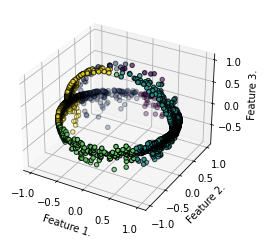

SSE:  [4.514821495394868, 4.459814834042272, 8.218624122306963, 4.360239332744571, 6.873795620502558]
GINI Index:  0.5163354639504878
-------------------------------------------------------------------------------------------------------
Trial:  2


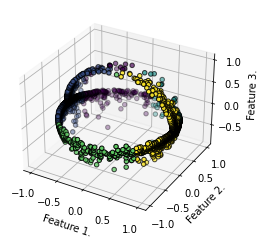

SSE:  [5.240290946442301, 7.07803485031478, 3.4740792682103145, 4.389959802122775, 8.059746803148888]
GINI Index:  0.515809167636001
-------------------------------------------------------------------------------------------------------
Trial:  3


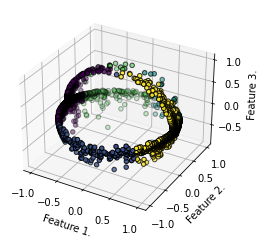

SSE:  [7.100547104529188, 4.360239332744571, 3.4740792682103145, 5.237623169427581, 8.059746803148888]
GINI Index:  0.515760401447722
-------------------------------------------------------------------------------------------------------
Trial:  4


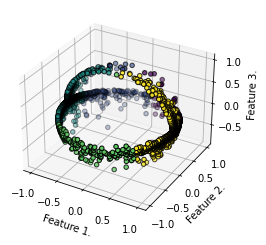

SSE:  [3.385862217615325, 5.25078248242423, 7.103946595599469, 4.389959802122775, 8.059746803148888]
GINI Index:  0.515663072831352
-------------------------------------------------------------------------------------------------------
Trial:  5


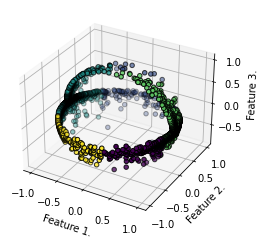

SSE:  [2.4663826375219946, 5.8549100905056415, 7.8814570144616365, 8.17103327165724, 2.7676830695127674]
GINI Index:  0.5162536261086468
-------------------------------------------------------------------------------------------------------
Trial:  6


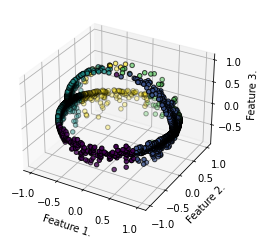

SSE:  [4.360239332744571, 7.499187740234552, 7.009492193122337, 5.527757676558859, 4.5332505935402]
GINI Index:  0.5167085763558749
-------------------------------------------------------------------------------------------------------
Trial:  7


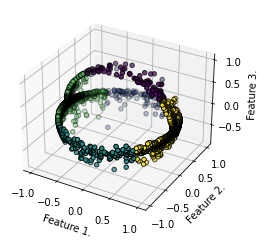

SSE:  [2.519636790522728, 3.7350277825138516, 3.919444360470642, 6.408604723454672, 5.66139886718154]
GINI Index:  0.5101099051764401
-------------------------------------------------------------------------------------------------------
Trial:  8


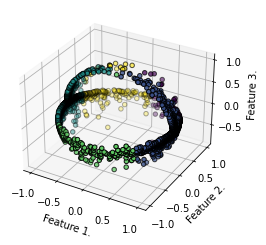

SSE:  [3.51782522256057, 8.059746803148888, 7.089598604017278, 4.360239332744571, 5.236096067125939]
GINI Index:  0.5158577900670922
-------------------------------------------------------------------------------------------------------
Trial:  9


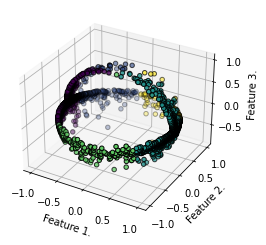

SSE:  [6.063797559635505, 6.043909030397215, 8.259820327477893, 4.360239332744571, 3.3807526016935063]
GINI Index:  0.5162862177382079
-------------------------------------------------------------------------------------------------------
Trial:  10


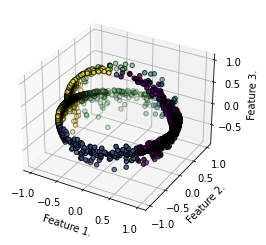

SSE:  [8.0632771521603, 4.360239332744571, 3.7329903381610245, 5.561423940287985, 6.751786726989564]
GINI Index:  0.5164902154379656
-------------------------------------------------------------------------------------------------------
Trial:  11


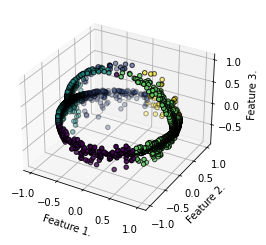

SSE:  [4.360239332744571, 5.561423940287985, 6.751786726989564, 8.0632771521603, 3.7329903381610245]
GINI Index:  0.5164902154379656
-------------------------------------------------------------------------------------------------------
Trial:  12


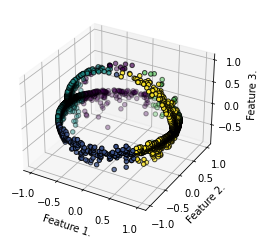

SSE:  [5.250140815075704, 4.389959802122775, 7.060964689485227, 3.5624374357381696, 8.059746803148888]
GINI Index:  0.5160282273388492
-------------------------------------------------------------------------------------------------------
Trial:  13


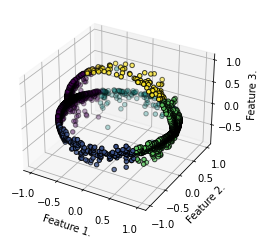

SSE:  [5.75568537907545, 3.919444360470642, 4.11987172549236, 5.895801819631397, 2.587540431082048]
GINI Index:  0.5104293861502891
-------------------------------------------------------------------------------------------------------
Trial:  14


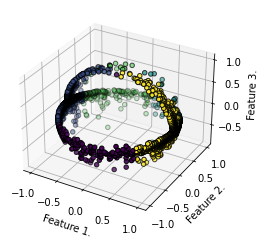

SSE:  [4.360239332744571, 7.120502870507113, 3.385862217615325, 5.25078248242423, 8.059746803148888]
GINI Index:  0.5156386628608689
-------------------------------------------------------------------------------------------------------
Trial:  15


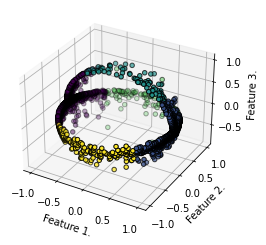

SSE:  [6.408604723454672, 5.647282156713689, 2.5663175032596257, 3.7350277825138516, 3.919444360470642]
GINI Index:  0.5101345314077362
-------------------------------------------------------------------------------------------------------
Trial:  16


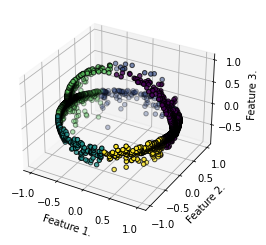

SSE:  [8.228649788543368, 5.821880186360094, 2.7676830695127674, 7.843879019855254, 2.4510066250797524]
GINI Index:  0.5161576150581544
-------------------------------------------------------------------------------------------------------
Trial:  17


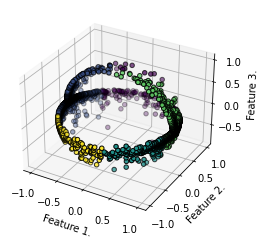

SSE:  [5.8549100905056415, 7.8814570144616365, 2.4510066250797524, 8.172145030516216, 2.7676830695127674]
GINI Index:  0.516181386246699
-------------------------------------------------------------------------------------------------------
Trial:  18


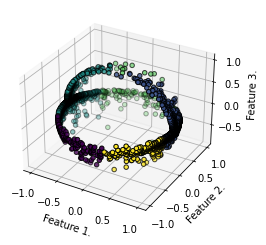

SSE:  [2.7676830695127674, 8.016533507256632, 7.843879019855254, 6.078839880673417, 2.4510066250797524]
GINI Index:  0.5161818662706998
-------------------------------------------------------------------------------------------------------
Trial:  19


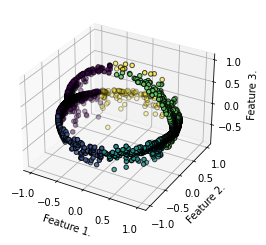

SSE:  [7.843879019855254, 2.7676830695127674, 2.4510066250797524, 8.228649788543368, 5.821880186360094]
GINI Index:  0.5161576150581544
-------------------------------------------------------------------------------------------------------
Trial:  20


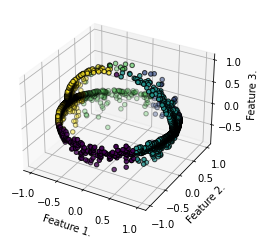

SSE:  [4.360239332744571, 3.385862217615325, 8.059746803148888, 5.25078248242423, 7.120502870507113]
GINI Index:  0.5156386628608689
-------------------------------------------------------------------------------------------------------


In [31]:
# Running Trials: My own K-Means Algorithm

for i in range(20):
    c, l = kmeans(data, 5)
    title = str(i + 1)
    my_own_kmeans_sse.append(graph(c, l, data, title))  

Trial:  1


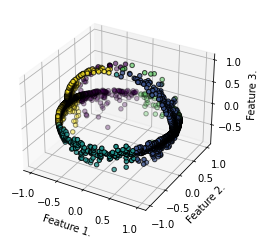

SSE:  [4.467566048498127, 8.218624122306915, 4.360239332744571, 4.514821495394869, 6.87315753944177]
GINI Index:  0.5163595964070955
-------------------------------------------------------------------------------------------------------
Trial:  2


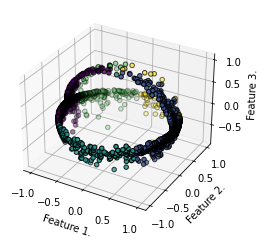

SSE:  [6.8737956205025625, 8.218624122306917, 4.360239332744571, 4.459814834042274, 4.514821495394869]
GINI Index:  0.5163354639504878
-------------------------------------------------------------------------------------------------------
Trial:  3


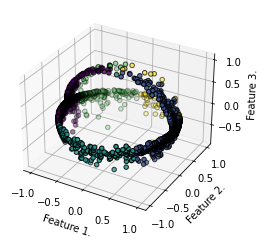

SSE:  [6.87315753944177, 8.218624122306917, 4.360239332744571, 4.467566048498127, 4.514821495394869]
GINI Index:  0.5163595964070955
-------------------------------------------------------------------------------------------------------
Trial:  4


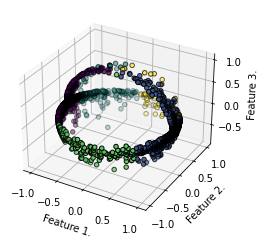

SSE:  [6.876932231504736, 8.218624122306917, 4.429762720284658, 4.360239332744571, 4.514821495394869]
GINI Index:  0.516214764165574
-------------------------------------------------------------------------------------------------------
Trial:  5


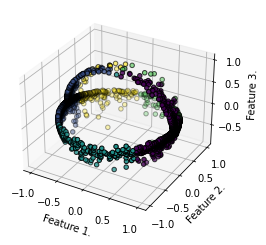

SSE:  [8.218624122306917, 6.87315753944177, 4.360239332744571, 4.514821495394869, 4.467566048498127]
GINI Index:  0.5163595964070955
-------------------------------------------------------------------------------------------------------
Trial:  6


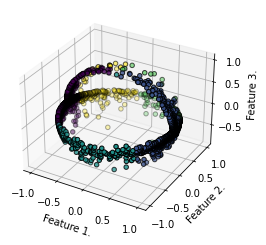

SSE:  [6.873157539441769, 8.218624122306915, 4.360239332744571, 4.514821495394869, 4.467566048498127]
GINI Index:  0.5163595964070955
-------------------------------------------------------------------------------------------------------
Trial:  7


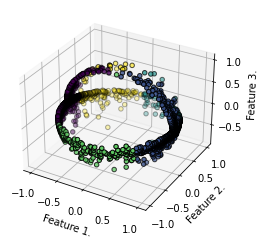

SSE:  [6.702267323840951, 8.243200902898252, 3.381075837916392, 4.360239332744571, 5.4242642668501535]
GINI Index:  0.5156354201987378
-------------------------------------------------------------------------------------------------------
Trial:  8


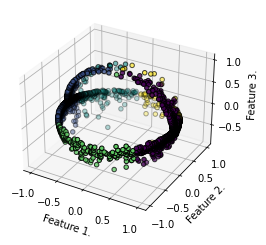

SSE:  [8.218624122306917, 6.87315753944177, 4.467566048498127, 4.360239332744571, 4.514821495394869]
GINI Index:  0.5163595964070955
-------------------------------------------------------------------------------------------------------
Trial:  9


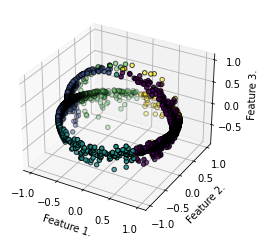

SSE:  [8.218624122306917, 6.87315753944177, 4.360239332744571, 4.467566048498127, 4.514821495394869]
GINI Index:  0.5163595964070955
-------------------------------------------------------------------------------------------------------
Trial:  10


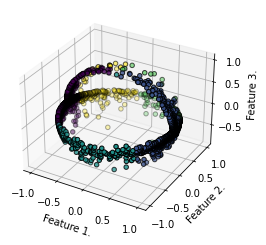

SSE:  [6.87315753944177, 8.218624122306917, 4.360239332744571, 4.514821495394869, 4.467566048498127]
GINI Index:  0.5163595964070955
-------------------------------------------------------------------------------------------------------
Trial:  11


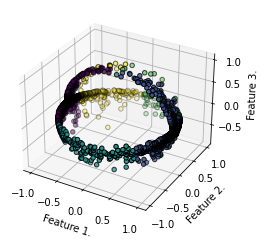

SSE:  [6.881696684371954, 8.200217390329577, 4.360239332744571, 4.536682983552715, 4.4783081622526915]
GINI Index:  0.5162411042325609
-------------------------------------------------------------------------------------------------------
Trial:  12


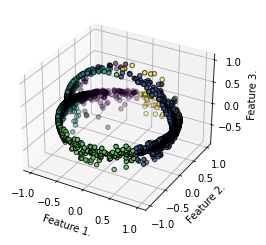

SSE:  [4.463076016954309, 8.218624122306917, 6.873729698484355, 4.360239332744571, 4.514821495394869]
GINI Index:  0.5163354639504878
-------------------------------------------------------------------------------------------------------
Trial:  13


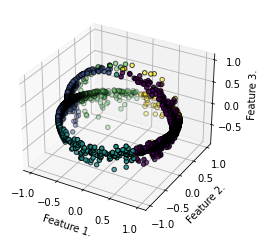

SSE:  [8.218624122306917, 6.873729698484355, 4.360239332744571, 4.463076016954309, 4.514821495394869]
GINI Index:  0.5163354639504878
-------------------------------------------------------------------------------------------------------
Trial:  14


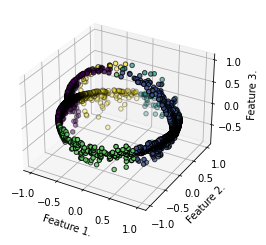

SSE:  [6.873157539441769, 8.218624122306917, 4.514821495394869, 4.360239332744571, 4.467566048498127]
GINI Index:  0.5163595964070955
-------------------------------------------------------------------------------------------------------
Trial:  15


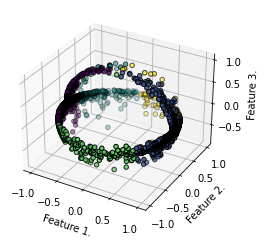

SSE:  [6.873157539441769, 8.218624122306917, 4.467566048498127, 4.360239332744571, 4.514821495394869]
GINI Index:  0.5163595964070955
-------------------------------------------------------------------------------------------------------
Trial:  16


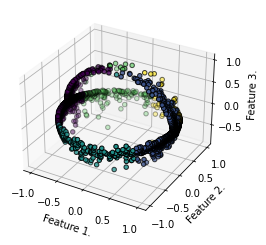

SSE:  [7.120502870507108, 8.059746803148851, 4.360239332744571, 5.25078248242423, 3.385862217615327]
GINI Index:  0.5156386628608688
-------------------------------------------------------------------------------------------------------
Trial:  17


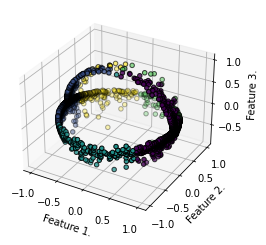

SSE:  [8.218624122306915, 6.87315753944177, 4.360239332744571, 4.514821495394869, 4.467566048498127]
GINI Index:  0.5163595964070955
-------------------------------------------------------------------------------------------------------
Trial:  18


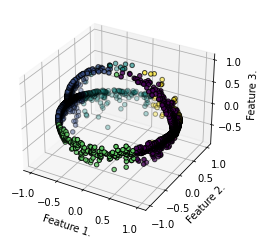

SSE:  [8.059746803148853, 7.103946595599464, 5.25078248242423, 4.389959802122775, 3.385862217615327]
GINI Index:  0.515663072831352
-------------------------------------------------------------------------------------------------------
Trial:  19


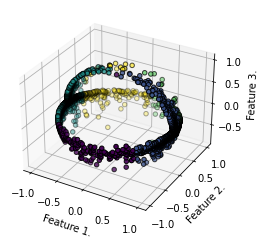

SSE:  [4.389959802122775, 8.059746803148851, 7.072989639347784, 3.517825222560573, 5.236096067125938]
GINI Index:  0.515882188787013
-------------------------------------------------------------------------------------------------------
Trial:  20


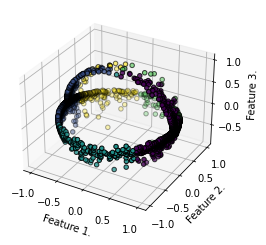

SSE:  [8.218624122306915, 6.87315753944177, 4.360239332744571, 4.514821495394869, 4.467566048498127]
GINI Index:  0.5163595964070955
-------------------------------------------------------------------------------------------------------


In [32]:
# Running Trials: Sklearn K-Means Algorithm

for i in range(20):
    k = KMeans(n_clusters=5).fit(data)
    title = str(i + 1)
    sklearn_kmeans_sse.append(graph(k.cluster_centers_, k.labels_, data, title))

Trial:  1


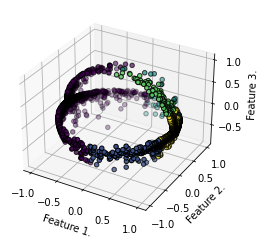

SSE:  [18.21394977259826, 3.2904883777249423, 4.5305342105833715, 1.3649275565540984, 1.7871515280067622]
GINI Index:  0.514687800318336
-------------------------------------------------------------------------------------------------------
Trial:  2


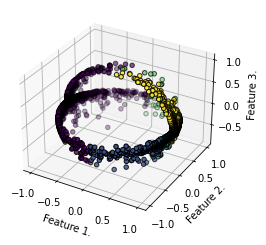

SSE:  [18.21394977259826, 3.2904883777249423, 0.6969399357246593, 4.318861835545966, 7.264134130011868]
GINI Index:  0.547155254920774
-------------------------------------------------------------------------------------------------------
Trial:  3


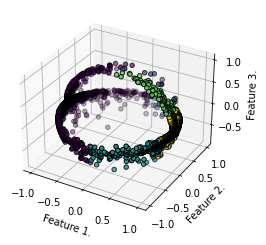

SSE:  [18.21394977259826, 4.595953151755673, 3.2016248298153727, 1.3666415150625837, 1.820442688751614]
GINI Index:  0.5144721257847441
-------------------------------------------------------------------------------------------------------
Trial:  4


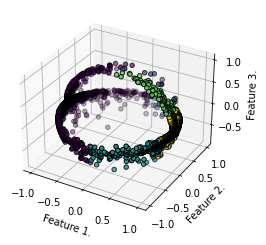

SSE:  [18.21394977259826, 4.595953151755673, 3.2016248298153727, 1.3666415150625837, 1.820442688751614]
GINI Index:  0.5144721257847441
-------------------------------------------------------------------------------------------------------
Trial:  5


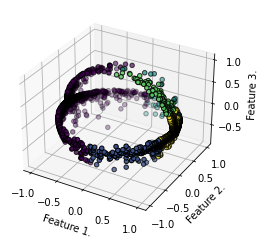

SSE:  [18.21394977259826, 3.2904883777249423, 4.5305342105833715, 1.3649275565540984, 1.7871515280067622]
GINI Index:  0.514687800318336
-------------------------------------------------------------------------------------------------------


In [33]:
# Running Trials: My Own Bisecting K-Means Algorithm

for i in range(5):
    c, l, d= bisect(data, 5)
    title = str(i + 1)
    my_own_bisect_sse.append(graph(c, l, d, title))  

In [34]:
# Comparing SSE from each version

print("My own K-Means Average SSE: ", sum([sum(i) for i in my_own_kmeans_sse]) / len(my_own_kmeans_sse))
print("Sklearn K-Means Average SSE: ", sum([sum(i) for i in sklearn_kmeans_sse]) / len(sklearn_kmeans_sse))
print("My own Bisecting K-Means Average SSE: ", sum([sum(i) for i in my_own_bisect_sse]) / len(my_own_bisect_sse))



My own K-Means Average SSE:  27.12313925861047
Sklearn K-Means Average SSE:  28.383969596020215
My own Bisecting K-Means Average SSE:  30.111140171701514
